In [ ]:
import torch.nn as nn
import torch
import numpy as np
import torch.optim as optim
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
ds1 = pd.read_csv('data/train.csv')
ds1 = ds1[ds1['Province_State'] == 'Alabama']
ds2 = pd.read_csv('data/test.csv')
ds2 = ds2[ds2['Province_State'] == 'Alabama']
value = pd.concat([ds1['Confirmed'],ds2['Confirmed']]).values[:]
real_value = ds1['Confirmed'].values[:]

FileNotFoundError: ignored

In [ ]:
value.shape

(168,)

In [ ]:
x = []
y = []
seq = 50
for i in range(len(value)-seq-1):
    x.append(value[i:i+seq])
    y.append(value[i+seq])
x_test = []
y_test = []
x_test.append(real_value[-seq:])
x_test

[array([ 55545,  57255,  59067,  61088,  63091,  65234,  67011,  68891,
         70358,  71813,  74212,  76005,  78130,  79294,  81115,  82366,
         83782,  85762,  87723,  89349,  91444,  92661,  93702,  94654,
         96592,  98301, 100173, 101334, 103020, 103851, 104786, 105557,
        106309, 107580, 108433, 109004, 110361, 111478, 112449, 113632,
        114532, 115060, 116710, 117242, 119254, 121023, 122185, 123889,
        125235, 126058], dtype=int64)]

In [ ]:
train_x = (torch.tensor(x[0:142 - seq]).float()/100000.).reshape(-1, seq, 1)
train_y = (torch.tensor(y[0:142 - seq]).float()/100000.).reshape(-1, 1)
test_x = (torch.tensor(x[142 - seq:]).float()/100000.).reshape(-1, seq, 1)
test_y = (torch.tensor(y[142 - seq:]).float()/100000.).reshape(-1, 1)

In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=16, num_layers=1, batch_first=True)
        self.linear = nn.Linear(16 * seq, 1)
    def forward(self, x):
        x, (h, c) = self.lstm(x)
        x = x.reshape(-1, 16 * seq)
        x = self.linear(x)
        return x

In [ ]:
model = LSTM()
optimzer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_func = nn.MSELoss()
model.train()

for epoch in range(2000):
    output = model(train_x)
    loss = loss_func(output, train_y)
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()
#     if epoch % 20 == 0:
#         tess_loss = loss_func(model(test_x), test_y)
#         print("epoch:{}, train_loss:{}, test_loss:{}".format(epoch, loss, tess_loss))

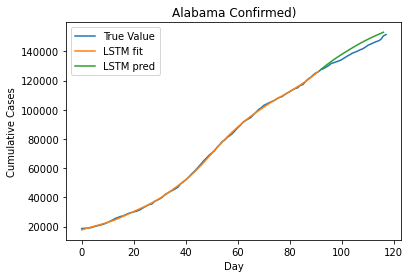

In [ ]:
model.eval()
prediction = list((model(train_x).data.reshape(-1))*100000) + list((model(test_x).data.reshape(-1))*100000)
plt.plot(value[seq:], label='True Value')
plt.plot(prediction[:142 - seq], label='LSTM fit')
plt.plot(np.arange(142 - seq, 142 - seq + 25, 1), prediction[142 - seq:], label='LSTM pred')
plt.legend(loc='best')
plt.title('Alabama Confirmed)')
plt.xlabel('Day')
plt.ylabel('Cumulative Cases')
plt.show()

In [ ]:
predictions = []
for i in range(26):
    x_pred = (torch.tensor(x_test[i]).float()/100000.).reshape(-1, seq, 1)
    pred = int(model(x_pred) * 100000)
    x_append = x_test[i][1:].tolist()
    x_append.append(pred)
    x_test.append(np.array(x_append, dtype='int64'))
    predictions.append(pred)
print(predictions)

[127697, 129122, 130556, 132000, 133421, 134844, 136232, 137607, 138972, 140340, 141688, 143014, 144292, 145524, 146731, 147897, 149043, 150158, 151214, 152223, 153175, 154075, 154937, 155784, 156604, 157387]


26

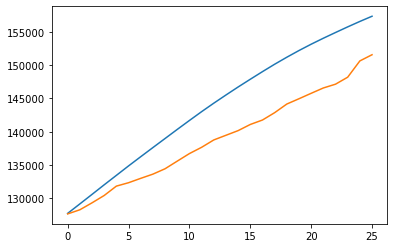

In [ ]:
plt.plot(predictions)
plt.plot(value[142:142 + 26])
len(predictions)